In [29]:
#pip3 install matplotlib netcdf4
import pathlib
import netCDF4 as nc
import matplotlib.pyplot as plt 

In [21]:
mva_data_root = pathlib.Path('data/lake_stamford/mva')
dset = nc.Dataset(mva_data_root / 'jason2_201_0230.nc')

In [7]:
dset

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    institution: DGFI-TUM
    mission: Jason2
    cycle: 005
    pass_number: 230
    first_meas_time: 2008-08-29 16:04:03
    last_meas_time: 2008-08-29 16:04:04
    creation_date: 2018-10-29 10:03:51
    dimensions(sizes): time(38)
    variables(dimensions): float64 jday(time), float64 glon(time), float64 glat(time), float64 hsat(time), float64 ralt_ocean(time), float64 uralt(time), float64 ralt_ice(time), float64 geoh(time), float64 wtrop(time), float64 dtrop(time), float64 ionos(time), float64 etide(time), float64 ptide(time)
    groups: 

In [23]:
sum_corrections = dset["geoh"][:] + dset["wtrop"][:] + dset["dtrop"][:] + dset["ionos"][:] + dset["etide"][:] + dset["ptide"][:]

In [26]:
heights_ice = dset["hsat"][:] - (dset["ralt_ice"][:] + sum_corrections)
heights_ocean = dset["hsat"][:] - (dset["ralt_ocean"][:] + sum_corrections) 

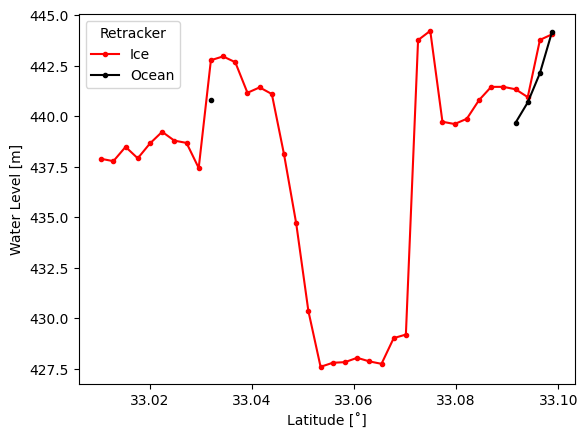

In [38]:
fig, ax = plt.subplots()
ax.plot(dset["glat"][:],heights_ice,marker='.',color="r",label='Ice')
ax.plot(dset["glat"][:],heights_ocean,marker='.',color="k",label='Ocean')
plt.legend(title='Retracker')
plt.xlabel("Latitude [˚]")
plt.ylabel("Water Level [m]")
plt.show()